# Importing data

In [1]:
import pandas as pd
import pyarrow.parquet as pq
from pathlib import Path

In [2]:
path_to_parquet_data = Path('./data/infl-en-dde')

df1 = pq.read_table(path_to_parquet_data / 'df1e.parquet').to_pandas()
df2 = pq.read_table(path_to_parquet_data / 'df2e.parquet').to_pandas()
df3 = pq.read_table(path_to_parquet_data / 'df3e.parquet').to_pandas()
df4 = pq.read_table(path_to_parquet_data / 'df4e.parquet').to_pandas()
df5 = pq.read_table(path_to_parquet_data / 'df5e.parquet').to_pandas()

# Filtering and joining

In [3]:
no_retweets_mask = df1['retweetbody'].isnull()
df1 = df1[no_retweets_mask]

In [4]:
df1

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime,retweetcount,favoritescount,generator,locationname,locationcode
1,"tag:search.twitter.com,2005:1000121300550062080",post,id:twitter.com:507547334,None,http://twitter.com/Bill_Dykes/statuses/1000121...,Heading into the Memorial Day weekend those in...,None,2018-05-25,2018-05-25T21:07:54.000Z,0,0.0,LinkedIn,None,None
2,"tag:search.twitter.com,2005:1000138945731031040",post,id:twitter.com:223565922,None,http://twitter.com/SoPhillyFred/statuses/10001...,Retweeted Ron Paul (@RonPaul):\n\nInflation is...,None,2018-05-25,2018-05-25T22:18:01.000Z,0,0.0,Facebook,None,None
3,"tag:search.twitter.com,2005:1000149645920735232",post,id:twitter.com:1252224511,None,http://twitter.com/EnergyPhilFlynn/statuses/10...,"Oil prices fall on talk of hike in production,...",None,2018-05-25,2018-05-25T23:00:32.000Z,0,0.0,Twitter Web Client,None,None
6,"tag:search.twitter.com,2005:1000562796646428673",post,id:twitter.com:992334290,None,http://twitter.com/JeanSwenson2/statuses/10005...,Gas prices up 60 cents over a year ago. And i...,None,2018-05-27,2018-05-27T02:22:14.000Z,0,0.0,Twitter Web Client,None,None
9,"tag:search.twitter.com,2005:1001436242440085504",post,id:twitter.com:21130921,None,http://twitter.com/WFAE/statuses/1001436242440...,"To Lower Your Medicare Drug Costs, Ask Your Ph...",None,2018-05-29,2018-05-29T12:13:00.000Z,0,0.0,Buffer,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905889,"tag:search.twitter.com,2005:998012788177014784",post,id:twitter.com:1942726112,None,http://twitter.com/ScottRiff/statuses/99801278...,Gasoline prices have been rising at a furious ...,None,2018-05-20,2018-05-20T01:29:25.000Z,0,0.0,Twitter Web Client,None,None
1905890,"tag:search.twitter.com,2005:998627744371134464",post,id:twitter.com:382381310,None,http://twitter.com/gregorymay1/statuses/998627...,Stock news Today I will buy a small amount to ...,None,2018-05-21,2018-05-21T18:13:02.000Z,0,0.0,Twitter for iPad,Bardonia,US
1905891,"tag:search.twitter.com,2005:998646409485316097",post,id:twitter.com:20015855,None,http://twitter.com/Smart_Realtor/statuses/9986...,Prices will likely be even higher near the end...,None,2018-05-21,2018-05-21T19:27:12.000Z,0,0.0,InStockSocial,None,None
1905894,"tag:search.twitter.com,2005:999387232157876224",post,id:twitter.com:877585625876221953,None,http://twitter.com/FeedYouDeals/statuses/99938...,Wolfgang Puck High-Performance Com...: List Pr...,None,2018-05-23,2018-05-23T20:30:58.000Z,0,0.0,dlvr.it,None,None


In [5]:
df1 = df1.merge(df4, how='left', left_on='id', right_on='id')

In [6]:
df1

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime_x,retweetcount,favoritescount,generator,locationname,locationcode,hashtag,postedtime_y
0,"tag:search.twitter.com,2005:1000121300550062080",post,id:twitter.com:507547334,None,http://twitter.com/Bill_Dykes/statuses/1000121...,Heading into the Memorial Day weekend those in...,None,2018-05-25,2018-05-25T21:07:54.000Z,0,0.0,LinkedIn,None,None,NaN,NaN
1,"tag:search.twitter.com,2005:1000138945731031040",post,id:twitter.com:223565922,None,http://twitter.com/SoPhillyFred/statuses/10001...,Retweeted Ron Paul (@RonPaul):\n\nInflation is...,None,2018-05-25,2018-05-25T22:18:01.000Z,0,0.0,Facebook,None,None,NaN,NaN
2,"tag:search.twitter.com,2005:1000149645920735232",post,id:twitter.com:1252224511,None,http://twitter.com/EnergyPhilFlynn/statuses/10...,"Oil prices fall on talk of hike in production,...",None,2018-05-25,2018-05-25T23:00:32.000Z,0,0.0,Twitter Web Client,None,None,GoogleAlerts,2018-05-25
3,"tag:search.twitter.com,2005:1000562796646428673",post,id:twitter.com:992334290,None,http://twitter.com/JeanSwenson2/statuses/10005...,Gas prices up 60 cents over a year ago. And i...,None,2018-05-27,2018-05-27T02:22:14.000Z,0,0.0,Twitter Web Client,None,None,NaN,NaN
4,"tag:search.twitter.com,2005:1001436242440085504",post,id:twitter.com:21130921,None,http://twitter.com/WFAE/statuses/1001436242440...,"To Lower Your Medicare Drug Costs, Ask Your Ph...",None,2018-05-29,2018-05-29T12:13:00.000Z,0,0.0,Buffer,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961059,"tag:search.twitter.com,2005:998012788177014784",post,id:twitter.com:1942726112,None,http://twitter.com/ScottRiff/statuses/99801278...,Gasoline prices have been rising at a furious ...,None,2018-05-20,2018-05-20T01:29:25.000Z,0,0.0,Twitter Web Client,None,None,NaN,NaN
961060,"tag:search.twitter.com,2005:998627744371134464",post,id:twitter.com:382381310,None,http://twitter.com/gregorymay1/statuses/998627...,Stock news Today I will buy a small amount to ...,None,2018-05-21,2018-05-21T18:13:02.000Z,0,0.0,Twitter for iPad,Bardonia,US,NaN,NaN
961061,"tag:search.twitter.com,2005:998646409485316097",post,id:twitter.com:20015855,None,http://twitter.com/Smart_Realtor/statuses/9986...,Prices will likely be even higher near the end...,None,2018-05-21,2018-05-21T19:27:12.000Z,0,0.0,InStockSocial,None,None,NaN,NaN
961062,"tag:search.twitter.com,2005:999387232157876224",post,id:twitter.com:877585625876221953,None,http://twitter.com/FeedYouDeals/statuses/99938...,Wolfgang Puck High-Performance Com...: List Pr...,None,2018-05-23,2018-05-23T20:30:58.000Z,0,0.0,dlvr.it,None,None,NaN,NaN


# Data cleaning

In [7]:
from dde.preprocessing.cleaning import data_preprocessing
from tqdm import tqdm

tqdm.pandas()


df1_cleaned = df1.copy()
df1_cleaned['body'] = df1['body'].progress_apply(lambda x: data_preprocessing(x))

100%|██████████| 961064/961064 [00:25<00:00, 38311.85it/s]


In [8]:
df1_cleaned

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime_x,retweetcount,favoritescount,generator,locationname,locationcode,hashtag,postedtime_y
0,"tag:search.twitter.com,2005:1000121300550062080",post,id:twitter.com:507547334,None,http://twitter.com/Bill_Dykes/statuses/1000121...,heading into the memorial day weekend those in...,None,2018-05-25,2018-05-25T21:07:54.000Z,0,0.0,LinkedIn,None,None,NaN,NaN
1,"tag:search.twitter.com,2005:1000138945731031040",post,id:twitter.com:223565922,None,http://twitter.com/SoPhillyFred/statuses/10001...,retweeted ron paul ronpaul\n is a vicious tax...,None,2018-05-25,2018-05-25T22:18:01.000Z,0,0.0,Facebook,None,None,NaN,NaN
2,"tag:search.twitter.com,2005:1000149645920735232",post,id:twitter.com:1252224511,None,http://twitter.com/EnergyPhilFlynn/statuses/10...,oil prices fall on talk of hike in production ...,None,2018-05-25,2018-05-25T23:00:32.000Z,0,0.0,Twitter Web Client,None,None,GoogleAlerts,2018-05-25
3,"tag:search.twitter.com,2005:1000562796646428673",post,id:twitter.com:992334290,None,http://twitter.com/JeanSwenson2/statuses/10005...,gas prices up 60 cents over a year ago and it...,None,2018-05-27,2018-05-27T02:22:14.000Z,0,0.0,Twitter Web Client,None,None,NaN,NaN
4,"tag:search.twitter.com,2005:1001436242440085504",post,id:twitter.com:21130921,None,http://twitter.com/WFAE/statuses/1001436242440...,to lower your medicare drug costs ask your pha...,None,2018-05-29,2018-05-29T12:13:00.000Z,0,0.0,Buffer,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961059,"tag:search.twitter.com,2005:998012788177014784",post,id:twitter.com:1942726112,None,http://twitter.com/ScottRiff/statuses/99801278...,gasoline prices have been rising at a furious ...,None,2018-05-20,2018-05-20T01:29:25.000Z,0,0.0,Twitter Web Client,None,None,NaN,NaN
961060,"tag:search.twitter.com,2005:998627744371134464",post,id:twitter.com:382381310,None,http://twitter.com/gregorymay1/statuses/998627...,stock news today i will buy a small amount to ...,None,2018-05-21,2018-05-21T18:13:02.000Z,0,0.0,Twitter for iPad,Bardonia,US,NaN,NaN
961061,"tag:search.twitter.com,2005:998646409485316097",post,id:twitter.com:20015855,None,http://twitter.com/Smart_Realtor/statuses/9986...,prices will likely be even higher near the end...,None,2018-05-21,2018-05-21T19:27:12.000Z,0,0.0,InStockSocial,None,None,NaN,NaN
961062,"tag:search.twitter.com,2005:999387232157876224",post,id:twitter.com:877585625876221953,None,http://twitter.com/FeedYouDeals/statuses/99938...,wolfgang puck high-performance com list price ...,None,2018-05-23,2018-05-23T20:30:58.000Z,0,0.0,dlvr.it,None,None,NaN,NaN


This tokenize and lemmatize the body of the tweets, but don't run it since it takes quite a lot of time.

In [9]:
from dde.preprocessing.nltk_processing import remove_stopwords, lemmatize
from tqdm import tqdm
tqdm.pandas()

# df1_lemmatized = df1_cleaned.copy()
# tokenize, lemmatize and remove the stopwords of the tweers
# df1_lemmatized['body'] = df1_cleaned['body'].progress_apply(lambda x: lemmatize(x))

In [10]:
# df1_lemmatized['body'] = df1_lemmatized['body'].progress_apply(lambda x: remove_stopwords(x))

**QUESTO STA QUA PERCHÈ È LUNGO RIRUNNARE LE FUNZIONI SOPRA**

In [11]:
df1_lemmatized = pd.read_csv('data/tokenized_lemmatized_df1/df1_lemmatized.csv')

In [12]:
df1_lemmatized = pd.read_csv("data/tokenized_lemmatized_df1/df1_lemmatized.csv", converters={"body": lambda x: x.strip("[]").replace("'","").split(", ")}, index_col=0)

In [13]:
df1_lemmatized

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime,retweetcount,favoritescount,generator,locationname,locationcode
1,"tag:search.twitter.com,2005:1000121300550062080",post,id:twitter.com:507547334,NaN,http://twitter.com/Bill_Dykes/statuses/1000121...,"[head, memorial, day, weekend, permian, basin,...",NaN,2018-05-25,2018-05-25T21:07:54.000Z,0,0.0,LinkedIn,NaN,NaN
2,"tag:search.twitter.com,2005:1000138945731031040",post,id:twitter.com:223565922,NaN,http://twitter.com/SoPhillyFred/statuses/10001...,"[retweeted, ron, paul, ronpaul, vicious, tax, ...",NaN,2018-05-25,2018-05-25T22:18:01.000Z,0,0.0,Facebook,NaN,NaN
3,"tag:search.twitter.com,2005:1000149645920735232",post,id:twitter.com:1252224511,NaN,http://twitter.com/EnergyPhilFlynn/statuses/10...,"[oil, price, fall, talk, hike, production, rai...",NaN,2018-05-25,2018-05-25T23:00:32.000Z,0,0.0,Twitter Web Client,NaN,NaN
6,"tag:search.twitter.com,2005:1000562796646428673",post,id:twitter.com:992334290,NaN,http://twitter.com/JeanSwenson2/statuses/10005...,"[gas, price, 60, cent, year, ago, make, americ...",NaN,2018-05-27,2018-05-27T02:22:14.000Z,0,0.0,Twitter Web Client,NaN,NaN
9,"tag:search.twitter.com,2005:1001436242440085504",post,id:twitter.com:21130921,NaN,http://twitter.com/WFAE/statuses/1001436242440...,"[lower, medicare, drug, cost, ask, pharmacist,...",NaN,2018-05-29,2018-05-29T12:13:00.000Z,0,0.0,Buffer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905889,"tag:search.twitter.com,2005:998012788177014784",post,id:twitter.com:1942726112,NaN,http://twitter.com/ScottRiff/statuses/99801278...,"[gasoline, price, rise, furious, clip, $, 192,...",NaN,2018-05-20,2018-05-20T01:29:25.000Z,0,0.0,Twitter Web Client,NaN,NaN
1905890,"tag:search.twitter.com,2005:998627744371134464",post,id:twitter.com:382381310,NaN,http://twitter.com/gregorymay1/statuses/998627...,"[stock, news, today, buy, small, amount, count...",NaN,2018-05-21,2018-05-21T18:13:02.000Z,0,0.0,Twitter for iPad,Bardonia,US
1905891,"tag:search.twitter.com,2005:998646409485316097",post,id:twitter.com:20015855,NaN,http://twitter.com/Smart_Realtor/statuses/9986...,"[price, likely, even, high, near, end, season,...",NaN,2018-05-21,2018-05-21T19:27:12.000Z,0,0.0,InStockSocial,NaN,NaN
1905894,"tag:search.twitter.com,2005:999387232157876224",post,id:twitter.com:877585625876221953,NaN,http://twitter.com/FeedYouDeals/statuses/99938...,"[wolfgang, puck, high-performance, com, list, ...",NaN,2018-05-23,2018-05-23T20:30:58.000Z,0,0.0,dlvr.it,NaN,NaN


**BOTS AND PROFESSIONALS**

# Vectorization

In [14]:
from tqdm import tqdm

tqdm.pandas()

In [15]:
text_corpus = df1_lemmatized['body'].progress_apply(lambda x: ' '.join(x))

100%|██████████| 866654/866654 [00:00<00:00, 1043961.82it/s]


In [16]:
complete_text_corpus = text_corpus.str.cat(sep=', ')

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# text_corpus = ... here the full body of tweets ...
vectorizer.fit(text_corpus)

CountVectorizer()

In [18]:
# X is the feature matrix it has number of rows equal to the number of tweets and columns equal to the features
X = vectorizer.transform(text_corpus)

# Building the Graph

In [19]:
import networkx as nx

G = nx.Graph()

In [20]:
df1_hashtags = df1['hashtag'].dropna().apply(lambda x: x.lower())

G.add_nodes_from(df1_hashtags.to_list())
nx.isolates(G)

<generator object isolates.<locals>.<genexpr> at 0x7fc2f4afb140>

In [21]:
df1_only_hashtags = df1.loc[df1_hashtags.index]
df1_only_hashtags['hashtag'] = df1_only_hashtags['hashtag'].apply(lambda x: x.lower())


df1_aggr = df1.copy()
df1_aggr = df1_only_hashtags.groupby(['id'])[
    ['hashtag']].agg(lambda x: list(x)).reset_index()

In [22]:
G.nodes

NodeView(('googlealerts', 'trump', 'motorcycle', 'tedeschitrucksband', 'mortgages', 'housing', 'fairfares', 'maga', 'drugpricing', 'hitachimagicwand', 'vibrators', 'sextoys', 'adulttoys', 'betteroffnow', 'traitortrump', 'job', 'engine', 'workers', 'payraise', 'phidc', 'resistance', 'traitorinchief', 'profusion', 'makeup', 'fall', 'pretty', 'minneapolis', 'affordablehousing', 'rantingguiltybaby', 'directprimarycare', 'couldnotbeme', 'deplorables', 'legoforma', 'wd', 'oilprice', 'inforgraphic', 'video', 'newsgrit', 'eurusd', 'financex', 'fnx', 'cryptocurrency', 'ico', 'blockchain', 'gohabsgo', 'club1909', 'southeastwi', 'homesales', 'li', 'inflation', 'rebates', 'everythinghesaysisalie', 'dispensary', 'thc', 'foxnews', 'stocks', 'mossyoak', 'sellers', 'stlwx', 'buyers', 'glassesuv', 'swimglasses', 'cannabis', 'youknowwhattheysay', 'feb19th', 'hololens2', 'artistlineup', 'woodstock50', 'realrxreport', 'titan', 'medical', 'fakenewscnn', 'chrysler', 'wheelchair', 'guruprinters', 'powerchall

In [23]:
import itertools

for row in df1_aggr['hashtag']:
    if type(row) == str or str(row[0]) == 'nan':
        ...
    else:
        for x in itertools.combinations(row, 2):

            if not G.has_edge(x[0], x[1]):
                G.add_edge(x[0], x[1])
                #   print('first if: ', x)
                G[x[0]][x[1]]['weight'] = 1
            else:

                G[x[0]][x[1]]['weight'] += 1

In [24]:
G.edges

EdgeView([('googlealerts', 'inflation'), ('googlealerts', 'leadership'), ('googlealerts', 'training'), ('googlealerts', 'ethics'), ('googlealerts', 'coffee'), ('trump', 'thanks'), ('trump', 'np'), ('trump', 'soundcloud'), ('trump', 'viral'), ('trump', 'mfa'), ('trump', 'mfanews'), ('trump', 'marchforamerica'), ('trump', 'potus'), ('trump', 'irandeal'), ('trump', 'mrtrump'), ('trump', 'inflation'), ('trump', 'petrodollar'), ('trump', 'uspolitics'), ('trump', 'midterms2018'), ('trump', 'maga'), ('trump', 'debt'), ('trump', 'tariffs'), ('trump', 'rates'), ('trump', 'iran'), ('trump', 'northkorea'), ('trump', 'qe'), ('trump', 'qt'), ('trump', 'fakefacts'), ('trump', 'fact'), ('trump', 'opec'), ('trump', 'artofthedeal'), ('trump', 'trumpeffect'), ('trump', 'presidenttrump'), ('trump', 'winning'), ('trump', 'tradewar'), ('trump', 'consumers'), ('trump', 'tradewars'), ('trump', 'trumptariffs'), ('trump', 'doe'), ('trump', 'newenergyrealism'), ('trump', 'oil'), ('trump', 'gasoline'), ('trump',

In [25]:
sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)

[('follow', 'beats', {'weight': 570}),
 ('btc', 'bitcoin', {'weight': 446}),
 ('wow', 'bfa', {'weight': 404}),
 ('wow', 'warcraft', {'weight': 404}),
 ('bfa', 'warcraft', {'weight': 404}),
 ('women', 'sterling', {'weight': 340}),
 ('women', 'rings', {'weight': 340}),
 ('sterling', 'rings', {'weight': 340}),
 ('jewelry', 'vintagejewelry', {'weight': 330}),
 ('inflation', 'fed', {'weight': 325}),
 ('jewelry', 'sale', {'weight': 313}),
 ('jewelry', 'vintagesale', {'weight': 311}),
 ('vintagejewelry', 'vintagesale', {'weight': 311}),
 ('vintagejewelry', 'sale', {'weight': 311}),
 ('vintagesale', 'sale', {'weight': 311}),
 ('wowtoken', 'woweu', {'weight': 299}),
 ('inflation', 'economy', {'weight': 298}),
 ('wowtoken', 'wowus', {'weight': 285}),
 ('forex', 'forextrading', {'weight': 270}),
 ('theslip', 'dawgliferecords', {'weight': 241}),
 ('fb', 'harddrive', {'weight': 196}),
 ('crypto', 'bitcoin', {'weight': 194}),
 ('gold', 'ebay', {'weight': 182}),
 ('jewelrysuppy', 'handmade', {'weight

In [26]:
threshold = 5

long_edges = list(filter(lambda e: e[2] < threshold, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)

In [27]:
G.remove_nodes_from(list(nx.isolates(G)))

In [28]:
print(len(G.nodes))
print(len(G.edges))

2099
4551


## Detecting the communities

In [29]:
import networkx.algorithms.community as nx_comm

comm = nx_comm.louvain_communities(G, resolution=1, seed=123)

# take only the communities that are larger than 5
communities = [community for community in comm if len(community) > 5]

In [30]:
def given_hashtag_return_community(hashtags, communities = communities):
    for hashtag in set(hashtags):
        for community in communities:
            if hashtag in community:
                return communities.index(community)

`labels` is the matrix that contains the community identification for each tweet

In [31]:
labels = [[] for x in range(0, len(df1_lemmatized))]

In [32]:
for id, row in df1_aggr.iterrows():
    community_index = given_hashtag_return_community(row['hashtag'])
    if community_index:
        labels[id].append(community_index)

# TSNMF

This is taken from this link: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

In [33]:
len(communities)

31

In [34]:
n_components = len(communities)

In [35]:
from tsnmf import TSNMF

tsnmf = TSNMF(n_components=n_components, random_state=1)
W = tsnmf.fit(X, labels=labels) # document X topic_matrix
# H = tsnmf.components_

In [36]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

Below we plot the words that most represent each topic

IndexError: index 10 is out of bounds for axis 0 with size 10

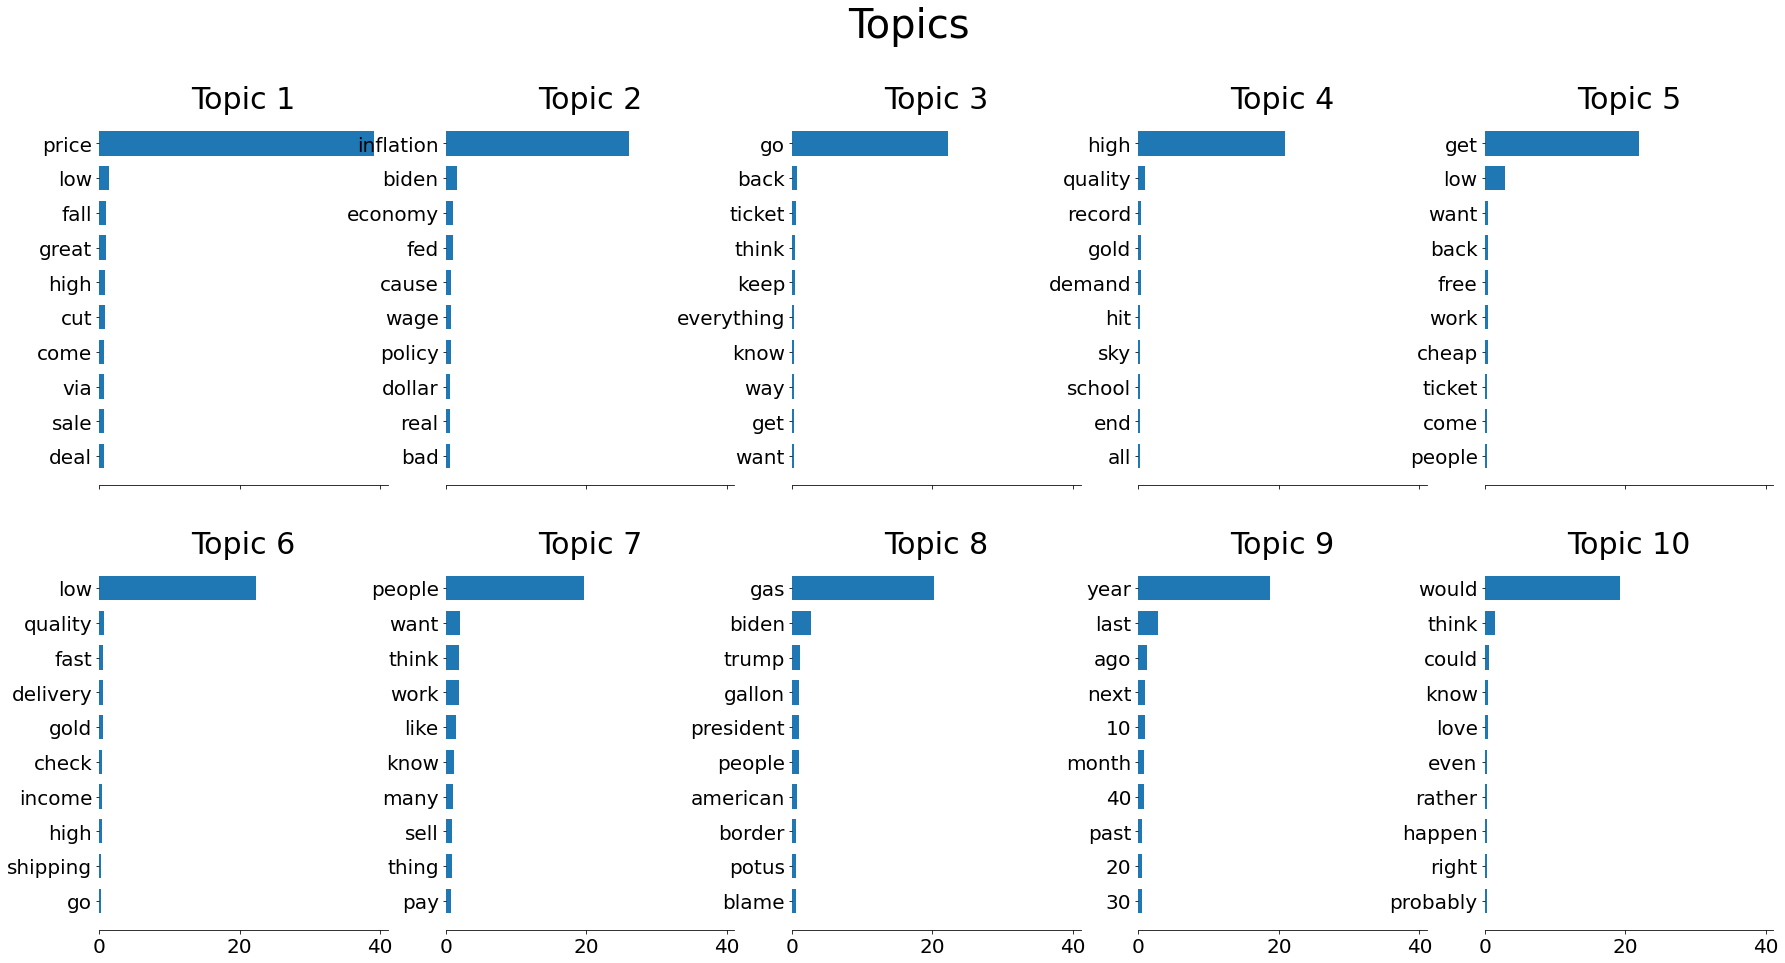

In [37]:
feat_names = vectorizer.get_feature_names_out()
n_top_words = 10
plot_top_words(tsnmf, feat_names, n_top_words, 'Topics')

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = n_components,
                                random_state=1,
                                verbose=7,
                                n_jobs=12)

res_lda = lda.fit(X)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   25.0s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   28.6s remaining:   57.2s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   36.1s remaining:   25.8s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   36.7s remaining:    7.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   37.9s finished


iteration: 1 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   18.5s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   19.3s remaining:   38.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   27.5s remaining:   19.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   28.1s remaining:    5.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   28.4s finished


iteration: 2 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   17.5s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   19.8s remaining:   39.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   26.3s remaining:   18.8s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   27.2s remaining:    5.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   27.6s finished


iteration: 3 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   16.1s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   17.9s remaining:   35.8s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   24.7s remaining:   17.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   25.3s remaining:    5.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   25.6s finished


iteration: 4 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   15.1s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   15.8s remaining:   31.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   23.2s remaining:   16.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   23.7s remaining:    4.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   24.1s finished


iteration: 5 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   14.4s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   17.2s remaining:   34.4s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   21.8s remaining:   15.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   22.5s remaining:    4.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   22.8s finished


iteration: 6 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   14.0s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   16.4s remaining:   32.8s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   21.0s remaining:   15.0s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   21.6s remaining:    4.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   22.1s finished


iteration: 7 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   13.6s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   14.2s remaining:   28.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   20.3s remaining:   14.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   20.8s remaining:    4.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   21.1s finished


iteration: 8 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   12.8s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   14.5s remaining:   29.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   19.9s remaining:   14.2s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   20.4s remaining:    4.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   20.8s finished


iteration: 9 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   12.9s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   13.7s remaining:   27.4s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   19.5s remaining:   13.9s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   20.0s remaining:    4.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   20.4s finished


iteration: 10 of max_iter: 10


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   10.4s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   12.1s remaining:   24.2s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   15.6s remaining:   11.2s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   16.0s remaining:    3.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   16.3s finished


IndexError: index 10 is out of bounds for axis 0 with size 10

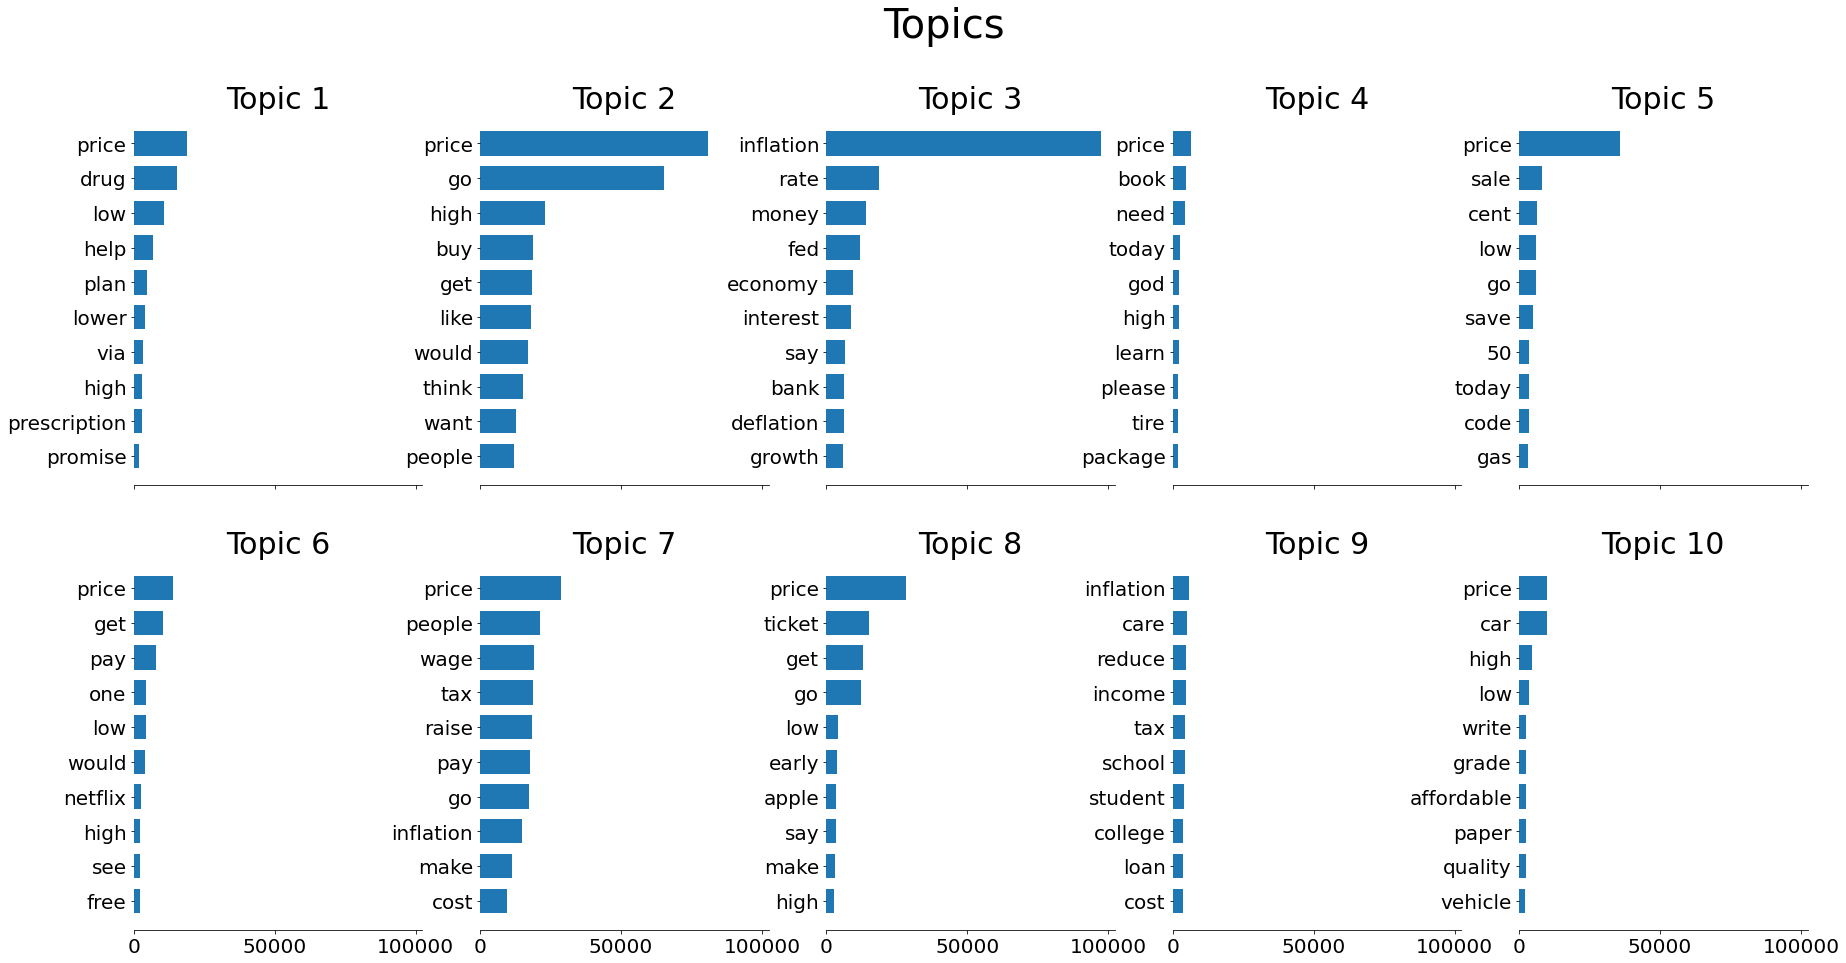

In [39]:
feat_names = vectorizer.get_feature_names_out()
n_top_words = 10
plot_top_words(res_lda, feat_names, n_top_words, 'Topics')

In [40]:
res_lda

LatentDirichletAllocation(n_components=31, n_jobs=12, random_state=1, verbose=7)

In [41]:
X[0, :]

<1x526983 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [42]:
results = lda.transform(X[0, :])

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 out of   1 | elapsed:    0.9s finished


In [43]:
results

array([[0.22783463, 0.00115207, 0.00115207, 0.04983224, 0.21428225,
        0.00115207, 0.00115207, 0.00115207, 0.00115207, 0.00115207,
        0.00115207, 0.09115537, 0.00115207, 0.00115207, 0.00115207,
        0.00115207, 0.00115207, 0.00115207, 0.00115207, 0.00115207,
        0.06462796, 0.00115207, 0.00115207, 0.13676562, 0.00115207,
        0.18785216, 0.00115207, 0.00115207, 0.00115207, 0.00115207,
        0.00115207]])

In [48]:
X[0, :]

<1x526983 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [49]:
tsnmf.transform(X, labels)

array([[7.50890795e-02, 6.20542752e-05, 9.33506368e-07, ...,
        6.21041460e-02, 2.86666206e-05, 7.09042371e-06],
       [4.09920961e-05, 7.13796271e-04, 2.02986990e-04, ...,
        1.53263357e-07, 5.79809603e-02, 8.20036685e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.54302150e-02, 5.02867076e-04, 1.32126487e-04, ...,
        1.75190647e-04, 4.41206215e-07, 1.05836075e-04],
       [5.06244315e-02, 3.59273450e-06, 8.55558706e-13, ...,
        9.73444139e-05, 3.41622628e-07, 1.69628317e-03],
       [3.84921607e-06, 3.68092489e-02, 1.36087932e-11, ...,
        2.20470400e-11, 8.09062333e-08, 2.72787941e-11]])

In [56]:
text = {word: value for word, value in lda.show_topic(0)}

AttributeError: 'LatentDirichletAllocation' object has no attribute 'show_topic'

# WordClouds

In [102]:
feat_names = vectorizer.get_feature_names_out()

list(get_weighted_words_topic(lda, feat_names))

[{'price': 19063.764665491624,
  'drug': 15249.568814560502,
  'low': 10866.919073173973,
  'help': 6885.31195730968,
  'plan': 4774.041321352431,
  'lower': 3988.6697254640844,
  'via': 3264.046322366131,
  'high': 3161.927120915962,
  'prescription': 3060.501055115825,
  'promise': 2030.3223321219382,
  'negotiate': 2012.5962128925428,
  'pharma': 1867.9845667285067,
  'cost': 1752.794473498003,
  'thank': 1748.4218655934264,
  'medicare': 1736.0266805328886,
  'trump': 1648.4563256065742,
  'tree': 1482.5595609158283,
  'big': 1444.2045863298258,
  'new': 1350.068770333445,
  'realdonaldtrump': 1296.9037933416205},
 {'price': 80821.09746992179,
  'go': 65394.05686797694,
  'high': 23200.43698751176,
  'buy': 18803.33581377738,
  'get': 18425.64418261701,
  'like': 18171.097527828293,
  'would': 16862.00900320042,
  'think': 15422.529341649451,
  'want': 12890.289500068408,
  'people': 12169.63968858619,
  'know': 11983.21390285343,
  'sell': 10207.838082333199,
  'make': 9948.351988

In [110]:
def get_weighted_words_topic(model, feature_names, n_top_words = 20):

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        weighted_words = dict(zip(top_features, weights))

        yield weighted_words

In [111]:
def plot_word_cloud(weighted_words):

    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate_from_frequencies(weighted_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [112]:
for idx, tmp in enumerate(get_weighted_words_topic(tsnmf, feat_names)):
    print("Topic ", idx, end = '\n')
    # plot_word_cloud(tmp)
    print(tmp.keys(), end = '------------------------------------- \n')

Topic  0
dict_keys(['price', 'low', 'fall', 'great', 'high', 'cut', 'come', 'via', 'sale', 'deal', 'sell', 'look', 'drive', 'drug', 'keep', 'lower', 'still', 'today', 'go', 'month'])------------------------------------- 
Topic  1
dict_keys(['inflation', 'biden', 'economy', 'fed', 'cause', 'wage', 'policy', 'dollar', 'real', 'bad', 'spending', 'supply', 'american', 'adjust', 'potus', 'covid', 'economic', 'growth', 'debt', 'even'])------------------------------------- 
Topic  2
dict_keys(['go', 'back', 'ticket', 'think', 'keep', 'everything', 'know', 'way', 'get', 'want', 'happen', 'wait', 'let', 'thing', 'soon', 'well', 'still', 'really', 'lol', 'much'])------------------------------------- 
Topic  3
dict_keys(['high', 'quality', 'record', 'gold', 'demand', 'hit', 'sky', 'school', 'end', 'all', 'lead', 'affordable', 'price', 'level', 'downtrend', 'mean', 'gas', 'food', '40', 'much'])------------------------------------- 
Topic  4
dict_keys(['get', 'low', 'want', 'back', 'free', 'work', 

In [113]:
for idx, tmp in enumerate(get_weighted_words_topic(lda, feat_names)):
    print("Topic ", idx, end = '\n')
    # plot_word_cloud(tmp)
    print(tmp.keys(), end = '------------------------------------- \n')

Topic  0
dict_keys(['price', 'drug', 'low', 'help', 'plan', 'lower', 'via', 'high', 'prescription', 'promise', 'negotiate', 'pharma', 'cost', 'thank', 'medicare', 'trump', 'tree', 'big', 'new', 'realdonaldtrump'])------------------------------------- 
Topic  1
dict_keys(['price', 'go', 'high', 'buy', 'get', 'like', 'would', 'think', 'want', 'people', 'know', 'sell', 'make', 'even', 'back', 'still', 'gas', 'see', 'way', 'thing'])------------------------------------- 
Topic  2
dict_keys(['inflation', 'rate', 'money', 'fed', 'economy', 'interest', 'say', 'bank', 'deflation', 'growth', 'market', 'spending', 'economic', 'dollar', 'policy', 'government', 'debt', 'asset', 'would', 'cause'])------------------------------------- 
Topic  3
dict_keys(['price', 'book', 'need', 'today', 'god', 'high', 'learn', 'please', 'tire', 'package', 'new', 'know', 'thought', 'visit', 'shoot', 'low', 'love', 'find', 'mask', 'good'])------------------------------------- 
Topic  4
dict_keys(['price', 'sale', 'ce

In [95]:
model = lda
feature_names = vectorizer.get_feature_names_out()
n_top_words = 20

for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    print(topic_idx, end = '\n')
    print(top_features)
    print(weights)

0
['price', 'drug', 'low', 'help', 'plan', 'lower', 'via', 'high', 'prescription', 'promise', 'negotiate', 'pharma', 'cost', 'thank', 'medicare', 'trump', 'tree', 'big', 'new', 'realdonaldtrump']
[19063.76466549 15249.56881456 10866.91907317  6885.31195731
  4774.04132135  3988.66972546  3264.04632237  3161.92712092
  3060.50105512  2030.32233212  2012.59621289  1867.98456673
  1752.7944735   1748.42186559  1736.02668053  1648.45632561
  1482.55956092  1444.20458633  1350.06877033  1296.90379334]
1
['price', 'go', 'high', 'buy', 'get', 'like', 'would', 'think', 'want', 'people', 'know', 'sell', 'make', 'even', 'back', 'still', 'gas', 'see', 'way', 'thing']
[80821.09746992 65394.05686798 23200.43698751 18803.33581378
 18425.64418262 18171.09752783 16862.0090032  15422.52934165
 12890.28950007 12169.63968859 11983.21390285 10207.83808233
  9948.35198869  9657.01243271  8900.92043997  8047.18762971
  7676.34897544  7409.95418706  7278.87862253  7224.48087871]
2
['inflation', 'rate', 'mone

In [82]:
comment_words = ''
tokens = ['price', 'drug', 'low', 'help', 'plan', 'lower', 'via', 'high', 'prescription', 'promise', 'negotiate', 'pharma', 'cost', 'thank', 'medicare', 'trump', 'tree', 'big', 'new', 'realdonaldtrump']
weight = [19063.76466549 ,15249.56881456, 10866.91907317 , 6885.31195731,
          4774.04132135 , 3988.66972546 , 3264.04632237  ,3161.92712092,
          3060.50105512 , 2030.32233212 , 2012.59621289 , 1867.98456673,
          1752.7944735  , 1748.42186559 , 1736.02668053 , 1648.45632561,
          1482.55956092 , 1444.20458633 , 1350.06877033 , 1296.90379334]
comment_words += " ".join(tokens)+" "
comment_words


'price drug low help plan lower via high prescription promise negotiate pharma cost thank medicare trump tree big new realdonaldtrump '

In [89]:
weights

[1.76466549,
 15249.56881456,
 10866.91907317,
 6885.31195731,
 4774.04132135,
 3988.66972546,
 3264.04632237,
 3161.92712092,
 3060.50105512,
 2030.32233212,
 2012.59621289,
 1867.98456673,
 1752.7944735,
 1748.42186559,
 1736.02668053,
 1648.45632561,
 1482.55956092,
 1444.20458633,
 1350.06877033,
 129600.90379334]

In [86]:
tmp = dict(zip(tokens, weight))
tmp

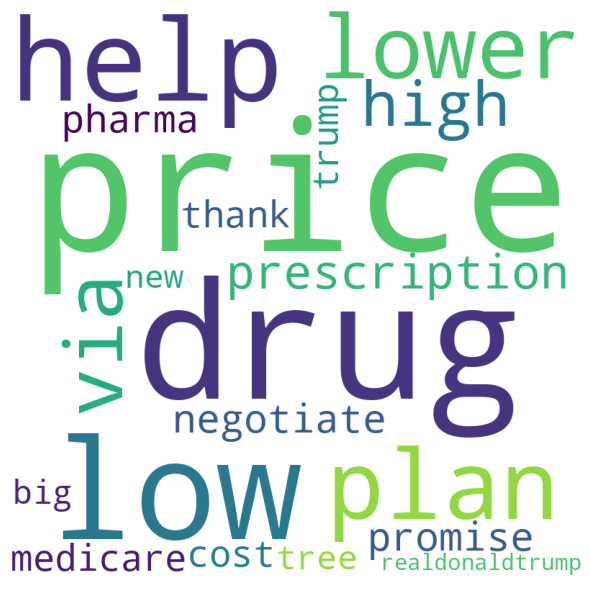

In [93]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate_from_frequencies(tmp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
from wordcloud import WordCloud
all_c_words = []
for i in range(k):
    words = []
    for j in order_centroids[i, :40]: #print out 40 feature terms of each cluster
        words.append(terms[j])
    all_c_words.append(words)

txt = []
for i in all_c_words:
    txt.append(' '.join(w for w in i))

# Extract tweet with topics

In [114]:
tmp = lda.transform(X)
tmp

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   11.9s remaining:   23.8s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   15.2s remaining:   10.9s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   15.8s remaining:    3.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   15.9s finished


array([[0.22783463, 0.00115207, 0.00115207, ..., 0.00115207, 0.00115207,
        0.00115207],
       [0.00358423, 0.00358423, 0.37067382, ..., 0.00358423, 0.00358423,
        0.00358423],
       [0.00268817, 0.00268817, 0.00268817, ..., 0.00268817, 0.00268817,
        0.00268817],
       ...,
       [0.00293255, 0.71797158, 0.00293255, ..., 0.00293255, 0.00293255,
        0.00293255],
       [0.00230415, 0.00230415, 0.00230415, ..., 0.00230415, 0.00230415,
        0.00230415],
       [0.00293255, 0.00293255, 0.53330956, ..., 0.00293255, 0.00293255,
        0.00293255]])

In [115]:
df1_lemmatized

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime,retweetcount,favoritescount,generator,locationname,locationcode
1,"tag:search.twitter.com,2005:1000121300550062080",post,id:twitter.com:507547334,NaN,http://twitter.com/Bill_Dykes/statuses/1000121...,"[head, memorial, day, weekend, permian, basin,...",NaN,2018-05-25,2018-05-25T21:07:54.000Z,0,0.0,LinkedIn,NaN,NaN
2,"tag:search.twitter.com,2005:1000138945731031040",post,id:twitter.com:223565922,NaN,http://twitter.com/SoPhillyFred/statuses/10001...,"[retweeted, ron, paul, ronpaul, vicious, tax, ...",NaN,2018-05-25,2018-05-25T22:18:01.000Z,0,0.0,Facebook,NaN,NaN
3,"tag:search.twitter.com,2005:1000149645920735232",post,id:twitter.com:1252224511,NaN,http://twitter.com/EnergyPhilFlynn/statuses/10...,"[oil, price, fall, talk, hike, production, rai...",NaN,2018-05-25,2018-05-25T23:00:32.000Z,0,0.0,Twitter Web Client,NaN,NaN
6,"tag:search.twitter.com,2005:1000562796646428673",post,id:twitter.com:992334290,NaN,http://twitter.com/JeanSwenson2/statuses/10005...,"[gas, price, 60, cent, year, ago, make, americ...",NaN,2018-05-27,2018-05-27T02:22:14.000Z,0,0.0,Twitter Web Client,NaN,NaN
9,"tag:search.twitter.com,2005:1001436242440085504",post,id:twitter.com:21130921,NaN,http://twitter.com/WFAE/statuses/1001436242440...,"[lower, medicare, drug, cost, ask, pharmacist,...",NaN,2018-05-29,2018-05-29T12:13:00.000Z,0,0.0,Buffer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905889,"tag:search.twitter.com,2005:998012788177014784",post,id:twitter.com:1942726112,NaN,http://twitter.com/ScottRiff/statuses/99801278...,"[gasoline, price, rise, furious, clip, $, 192,...",NaN,2018-05-20,2018-05-20T01:29:25.000Z,0,0.0,Twitter Web Client,NaN,NaN
1905890,"tag:search.twitter.com,2005:998627744371134464",post,id:twitter.com:382381310,NaN,http://twitter.com/gregorymay1/statuses/998627...,"[stock, news, today, buy, small, amount, count...",NaN,2018-05-21,2018-05-21T18:13:02.000Z,0,0.0,Twitter for iPad,Bardonia,US
1905891,"tag:search.twitter.com,2005:998646409485316097",post,id:twitter.com:20015855,NaN,http://twitter.com/Smart_Realtor/statuses/9986...,"[price, likely, even, high, near, end, season,...",NaN,2018-05-21,2018-05-21T19:27:12.000Z,0,0.0,InStockSocial,NaN,NaN
1905894,"tag:search.twitter.com,2005:999387232157876224",post,id:twitter.com:877585625876221953,NaN,http://twitter.com/FeedYouDeals/statuses/99938...,"[wolfgang, puck, high-performance, com, list, ...",NaN,2018-05-23,2018-05-23T20:30:58.000Z,0,0.0,dlvr.it,NaN,NaN


In [116]:
tmp.apply(lambda x: max(x))

AttributeError: 'numpy.ndarray' object has no attribute 'apply'